This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [9]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


469/469 [==============================] - 4s 6ms/step - loss: 0.2645 - accuracy: 0.9236
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1078 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0698 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0508 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0381 - accuracy: 0.9884


**Using the model to make predictions**

In [12]:
test_digits = test_images[0:10] # 10 iamges taken
predictions = model.predict(test_digits)
predictions[0]  #1st image probalilities

1/1 [==============================] - 0s 89ms/step


array([8.43707415e-09, 1.20773869e-09, 3.20562026e-06, 6.24366794e-06,
       1.44976045e-11, 4.69746853e-10, 2.16620081e-12, 9.99989748e-01,
       1.07285722e-07, 6.76903710e-07], dtype=float32)

In [13]:
len(test_digits)

10

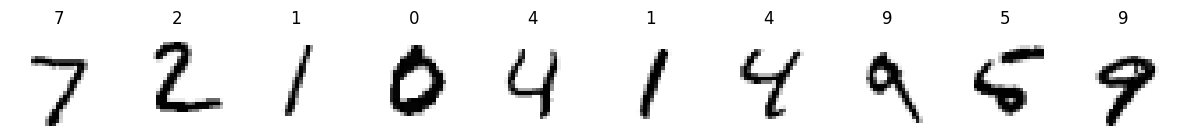

In [14]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(1, 10, figsize=(15, 2))  # Adjust figsize as needed

for idx, img in enumerate(test_digits):
    img_r = img.reshape(28,28)
    axes[idx].imshow(img_r, cmap=plt.cm.binary)
    axes[idx].axis('off')
    pr = np.argmax(predictions[idx])
    axes[idx].set_title(str(pr))
plt.show()


In [15]:
test_labels[0]

7

**Evaluating the model on new data**

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 1ms/step - loss: 0.0649 - accuracy: 0.9794
test_acc: 0.9793999791145325


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [17]:
import numpy as np
x = np.array(12)
x

array(12)

In [18]:
x.ndim

0

### Vectors (rank-1 tensors)

In [19]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

### Matrices (rank-2 tensors)

In [21]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [22]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [23]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
train_images.ndim

3

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

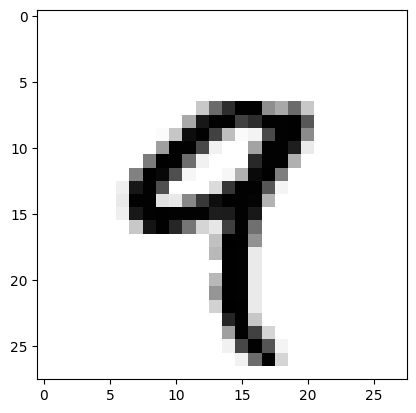

In [27]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [28]:
import matplotlib.pyplot as plt
def show(img):
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()

In [29]:
train_labels[4]

9

### The notion of data batches

In [30]:
batch = train_images[:128]

In [31]:
batch = train_images[128:256]

In [32]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [33]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [34]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

Vector Operation

In [35]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.00 s


non vector approach

In [36]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.46 s


### Broadcasting

In [37]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [38]:
y.shape

(10,)

In [39]:
y = np.expand_dims(y, axis=0)

In [40]:
y.shape

(1, 10)

In [41]:
Y = np.concatenate([y] * 32, axis=0)

In [42]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [43]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

single dimensional vectors (vectorized dot product)

In [44]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

single dim : non-vactorized naive dot product

In [45]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

x is matrix (2 sim), y is vector (1 dim)

In [46]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]  # no. of columns in x must equal no. of rows in y
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

Using above function

In [47]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

now defining function for naive dot procuct of 2 matrices (both 2 dim)

In [48]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [49]:
train_images = train_images.reshape((60000, 28 * 28))

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

1d tensor

In [50]:
import tensorflow as tf
x = tf.Variable(0.)  # Create a TensorFlow variable 'x' and initialize with 0.

# Define a context manager for automatic differentiation.
with tf.GradientTape() as tape: 
    y = 2 * x + 3  # Define a linear function.

# Calculate the gradient of 'y' with respect to 'x'.
grad_of_y_wrt_x = tape.gradient(y, x)
# Print the calculated gradient.
print(grad_of_y_wrt_x)

tf.Tensor(2.0, shape=(), dtype=float32)


2d tensor

In [51]:
#similar as sbove except x holds 2 values
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
print(grad_of_y_wrt_x)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


weights update mechanism (internally)

In [52]:
import tensorflow as tf

# Define a TensorFlow variable 'W' with random values in a 2x2 matrix.
W = tf.Variable(tf.random.uniform((2, 2)))

# Define a TensorFlow variable 'b' with zeros in a 2-dimensional vector.
b = tf.Variable(tf.zeros((2,)))

# Generate a random input data tensor 'x' as a 2x2 matrix. this is feature tensor
x = tf.random.uniform((2, 2))

# Define a context manager for automatic differentiation.
with tf.GradientTape() as tape:
    # Calculate the output 'y' using matrix multiplication (matmul) and addition.
    y = tf.matmul(x, W) + b

# Calculate the gradient of 'y' with respect to both 'W' and 'b'.
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
#print
print(grad_of_y_wrt_W_and_b)

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.93444335, 0.93444335],
       [0.76206493, 0.76206493]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]


## Looking back at our first example

In [53]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [54]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [55]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [56]:
%%time
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
  1/469 [..............................] - ETA: 2:54 - loss: 2.4114 - accuracy: 0.0703

469/469 [==============================] - 3s 7ms/step - loss: 0.2617 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1066 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0705 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0516 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0387 - accuracy: 0.9880
CPU times: total: 6.84 s
Wall time: 14.9 s


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [57]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        # Initialize the weight matrix W with random values between 0 and 0.1
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        # Initialize the bias vector b with zeros
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [58]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)  # Apply each layer sequentially
        return x

    @property  # this decorator acts like a getter method and one can use model.weights to access weight as an attribute
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights  # Collect weights from each layer
        return weights

In [59]:
%%timeit
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

4.09 ms ± 320 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### A batch generator

In [60]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        
        assert len(images) == len(labels)

        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size

        # Calculate the total number of batches
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        # Slice the images and labels for the current batch
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]

        # Increment the index for the next batch
        self.index += self.batch_size

        return images, labels


### Running one training step

In [61]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)

    return average_loss

Updating gradients using simple tensor operations

In [62]:
learning_rate = 1e-3
# Define a function to update model weights
def update_weights(gradients, weights):
    # Iterate over the gradients and weights
    for gradient, weight in zip(gradients, weights):
        # Update the weight using gradient descent
        weight.assign_sub(gradient * learning_rate)

Updating gradients using Optimizer

In [63]:
from tensorflow.keras import optimizers

# Create an instance of the SGD optimizer with a specified learning rate
optimizer = optimizers.SGD(learning_rate=1e-3)

# Define a function to update model weights using the optimizer
def update_weights(gradients, weights):
    # Zip gradients and weights together and apply the updates
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [68]:
#Training loop for a machine learning model using mini-batch stochastic gradient descent.
def fit(model, images, labels, epochs, batch_size=128):
    # Loop over the specified number of epochs
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels, batch_size)
        
        # Loop over mini-batches within the epoch
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"Loss at batch {batch_counter}: {loss:.5f}")

In [71]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))  # Reshape images to 1D vectors
train_images = train_images.astype("float32") / 255  # Normalize pixel values to [0, 1]
test_images = test_images.reshape((10000, 28 * 28))  # Reshape test images
test_images = test_images.astype("float32") / 255  # Normalize test images

# Call training loop functionl
fit(model, train_images, train_labels, epochs=10, batch_size=256)

Epoch 0
Loss at batch 0: 0.03258
Loss at batch 100: 0.02386
Loss at batch 200: 0.04201
Epoch 1
Loss at batch 0: 0.03251
Loss at batch 100: 0.02386
Loss at batch 200: 0.04197
Epoch 2
Loss at batch 0: 0.03244
Loss at batch 100: 0.02385
Loss at batch 200: 0.04194
Epoch 3
Loss at batch 0: 0.03238
Loss at batch 100: 0.02385
Loss at batch 200: 0.04190
Epoch 4
Loss at batch 0: 0.03231
Loss at batch 100: 0.02384
Loss at batch 200: 0.04187
Epoch 5
Loss at batch 0: 0.03225
Loss at batch 100: 0.02384
Loss at batch 200: 0.04184
Epoch 6
Loss at batch 0: 0.03218
Loss at batch 100: 0.02383
Loss at batch 200: 0.04180
Epoch 7
Loss at batch 0: 0.03212
Loss at batch 100: 0.02383
Loss at batch 200: 0.04176
Epoch 8
Loss at batch 0: 0.03206
Loss at batch 100: 0.02382
Loss at batch 200: 0.04173
Epoch 9
Loss at batch 0: 0.03200
Loss at batch 100: 0.02382
Loss at batch 200: 0.04169


### Evaluating the model

In [70]:
predictions = model(test_images)
predictions = predictions.numpy()

# Find the predicted labels by taking the argmax along axis 1
predicted_labels = np.argmax(predictions, axis=1)

# Compare the predicted labels with the true test labels to check for matches
matches = predicted_labels == test_labels

# Calculate and print the accuracy of the model's predictions
accuracy = matches.mean()
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


## Summary